# <h1 align="center"> <font color='royalblue'><font size=6>Walmart - Confidence Interval and CLT</font> </font></h1>

<h2 align='right'>- <font color='green'><b> Vijay Kumar</b></font></h2>

##  What is Walmart?



`Walmart`, founded in `1962 by Sam Walton`, is a retail giant and one of the world's largest and most influential companies. Headquartered in `Bentonville, Arkansas`, this American multinational corporation has established itself as a global powerhouse in the retail industry. Walmart operates a vast network of hypermarkets, discount department stores, and grocery stores under various brand names across the United States and in numerous countries around the world.

Known for its `"Everyday Low Prices"` strategy, Walmart has redefined the retail landscape with its commitment to offering a wide range of products at affordable prices. With its extensive supply chain and efficient distribution systems, the company has played a pivotal role in shaping consumer expectations and shopping habits. Beyond retail, Walmart has also ventured into e-commerce, technology innovation, and sustainability initiatives, further solidifying its position as a key player in the modern retail ecosystem.



##  Objective

The objective of this project is to conduct a comprehensive analysis of customer purchase behavior, with a specific focus on purchase amounts at Walmart. This study aims to provide valuable insights that can assist the management team at Walmart. in making data-driven decisions.


##  About Data

The company collected the transactional data of customers who purchased products from the Walmart Stores.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import statistics
from scipy import stats

import math


In [ ]:
data=pd.read_csv('/content/walmart_data.csv')

In [ ]:
#@title 1: Initial data exploration

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149490 entries, 0 to 150254
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     149490 non-null  object
 1   Product_ID                  149490 non-null  object
 2   Gender                      149490 non-null  object
 3   Age                         149490 non-null  object
 4   Occupation                  149490 non-null  object
 5   City_Category               149490 non-null  object
 6   Stay_In_Current_City_Years  149490 non-null  object
 7   Marital_Status              149490 non-null  object
 8   Product_Category            149490 non-null  object
 9   Purchase                    149490 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 12.5+ MB


There are total:

    *   10 columns:
    *   5 columns are of type object, rest are of type Integer
    *   550068 rows are there in the given data
There are no null values in the data



In [ ]:
data.nunique()

,0
User_ID,5873
Product_ID,3417
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,18
Purchase,14522


There are:

      * 5891 different users
      * 3631 products
      * 2 genders(F=Female,M=Male)
      * 7 different age groups
      * Customers belong to 21 different occupations
      * 3 city categories
      * Marital status to know if customers are married or unmarried
      * 20 different product categories
      

We are gonna convert all the columns except  "Purchase" into object data type to use as categorical data




In [ ]:
data=data.astype({
    'User_ID':'object',
    'Occupation':'object',
    'Marital_Status':'object',
    'Product_Category':'object',
}

)

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149490 entries, 0 to 150254
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     149490 non-null  object
 1   Product_ID                  149490 non-null  object
 2   Gender                      149490 non-null  object
 3   Age                         149490 non-null  object
 4   Occupation                  149490 non-null  object
 5   City_Category               149490 non-null  object
 6   Stay_In_Current_City_Years  149490 non-null  object
 7   Marital_Status              149490 non-null  object
 8   Product_Category            149490 non-null  object
 9   Purchase                    149490 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 12.5+ MB


In [ ]:
data['Marital_Status']=data['Marital_Status'].replace({0:'Single',1:'Married'})

Marital Status data has been converted as:

    * 0-> Single
    * 1-> Married

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [ ]:
#@title 2: Null value detection and outlier treatment

In [ ]:
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
data.duplicated().sum()

0

There are no null or duplicate values in the data

In [ ]:
#@title Outlier detection in purchase amount and clipping of data

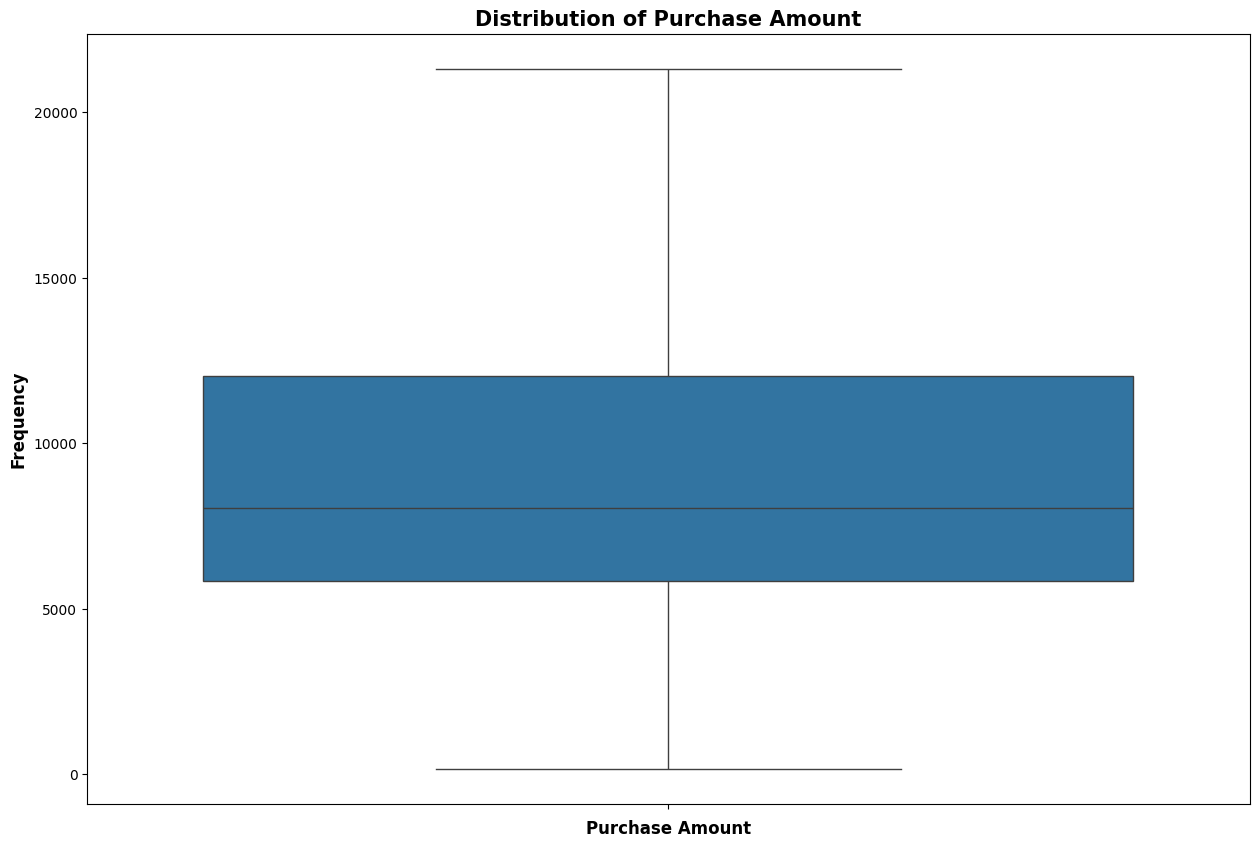

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data['Purchase'])
plt.xlabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 12,fontweight = 'bold')
plt.title('Distribution of Purchase Amount',fontsize = 15,fontweight = 'bold')
plt.show()


In [ ]:
percentiles = data['Purchase'].quantile([0.25, 0.75])
IQR=percentiles.iloc[1]-percentiles.iloc[0]
lower_bound=percentiles.iloc[0]-1.5*IQR
upper_bound=percentiles.iloc[1]+1.5*IQR
print("Lower Bound:",lower_bound)
print("Upper Bound:",upper_bound)


data = data[
    (data['Purchase'] >= lower_bound) & (data['Purchase'] <= upper_bound)
]

Lower Bound: -3448.875
Upper Bound: 21314.125


Data outside of lower and upper bound calculated using 1.5 times of the Inter Quartile Range has been clipped off and data has been finalised for further analysis

In [ ]:
data.shape

(149490, 10)

Our Final data for use has a total of 547391 rows of data

In [ ]:
#@title  3:Univariate Analysis

In [ ]:
#@title 3.1: Purchase amount distribution

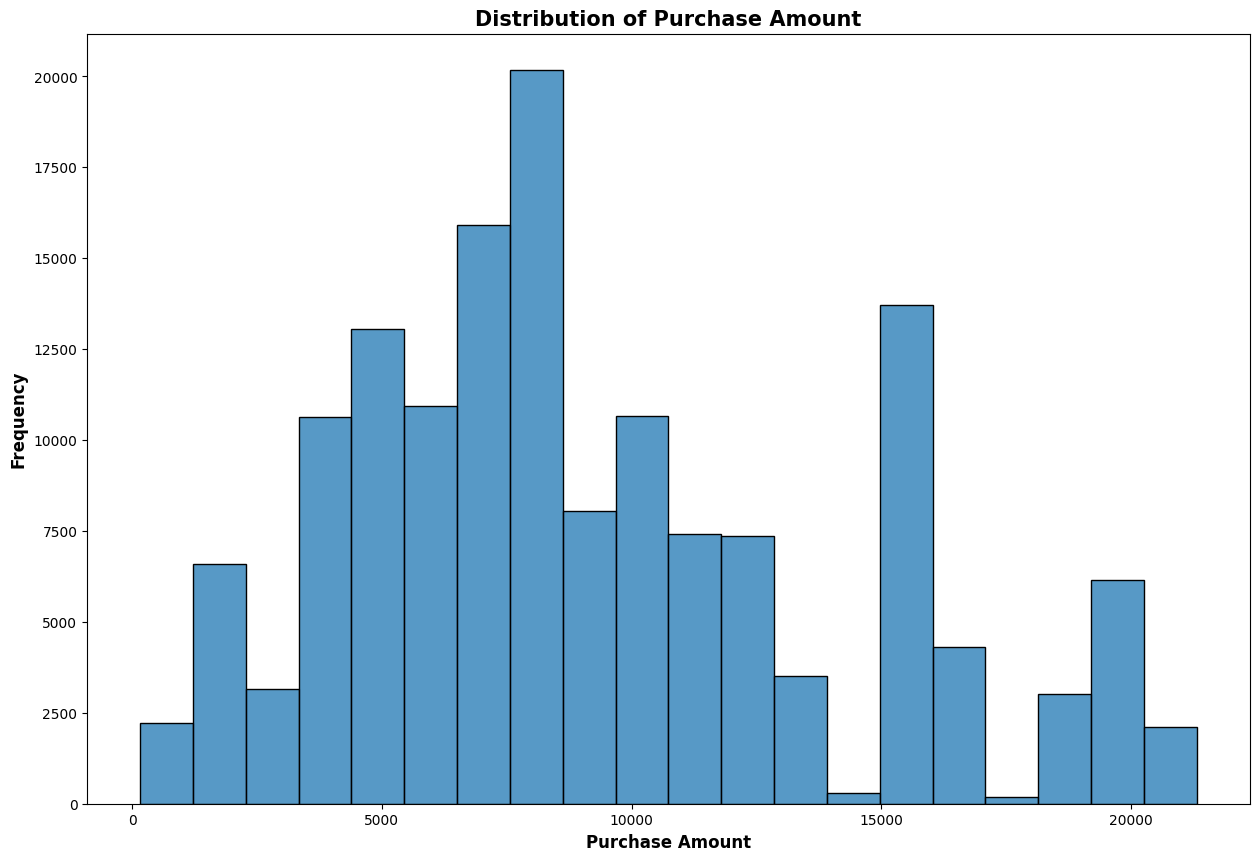

In [ ]:
plt.figure(figsize=(15,10))

sns.histplot(data=data,x='Purchase',bins=20)
plt.xlabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 12,fontweight = 'bold')
plt.title('Distribution of Purchase Amount',fontsize = 15,fontweight = 'bold')
plt.show()

* Highest no of purchase order value falls in the range of 7000
* Customers ordering in values between 5000-10000 per order has been found to be the highest
* Orders in the range of 16000 have also been much frequent

In [ ]:
#@title 3.2: Gender, Marital Status  and City Category Distribution

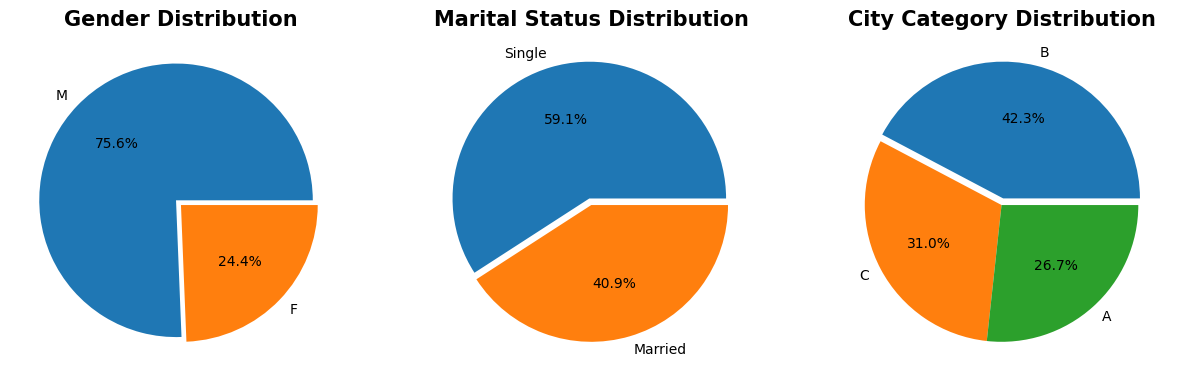

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.pie(data['Gender'].value_counts(),labels=data['Gender'].value_counts().index,autopct='%1.1f%%',explode=(0.05,0))
plt.title('Gender Distribution',fontsize = 15,fontweight = 'bold')

plt.subplot(1,3,2)
plt.pie(data['Marital_Status'].value_counts(),labels=data['Marital_Status'].value_counts().index,autopct='%1.1f%%',explode=(0.05,0))
plt.title('Marital Status Distribution',fontsize = 15,fontweight = 'bold')

plt.subplot(1,3,3)
plt.pie(data['City_Category'].value_counts(),labels=data['City_Category'].value_counts().index,autopct='%1.1f%%',explode=(0.05,0,0))
plt.title('City Category Distribution',fontsize = 15,fontweight = 'bold')

plt.show()



    * 75% of the customers are male
    * 60% of the customers are unmarried
    * Cities lying in category 'B' have generated the highest no of orders

In [ ]:
#@title 3.3: Customer Age Distribution

<ipython-input-978-a8b81cdcdece>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp1.index,y=temp1.values, palette=color_map)


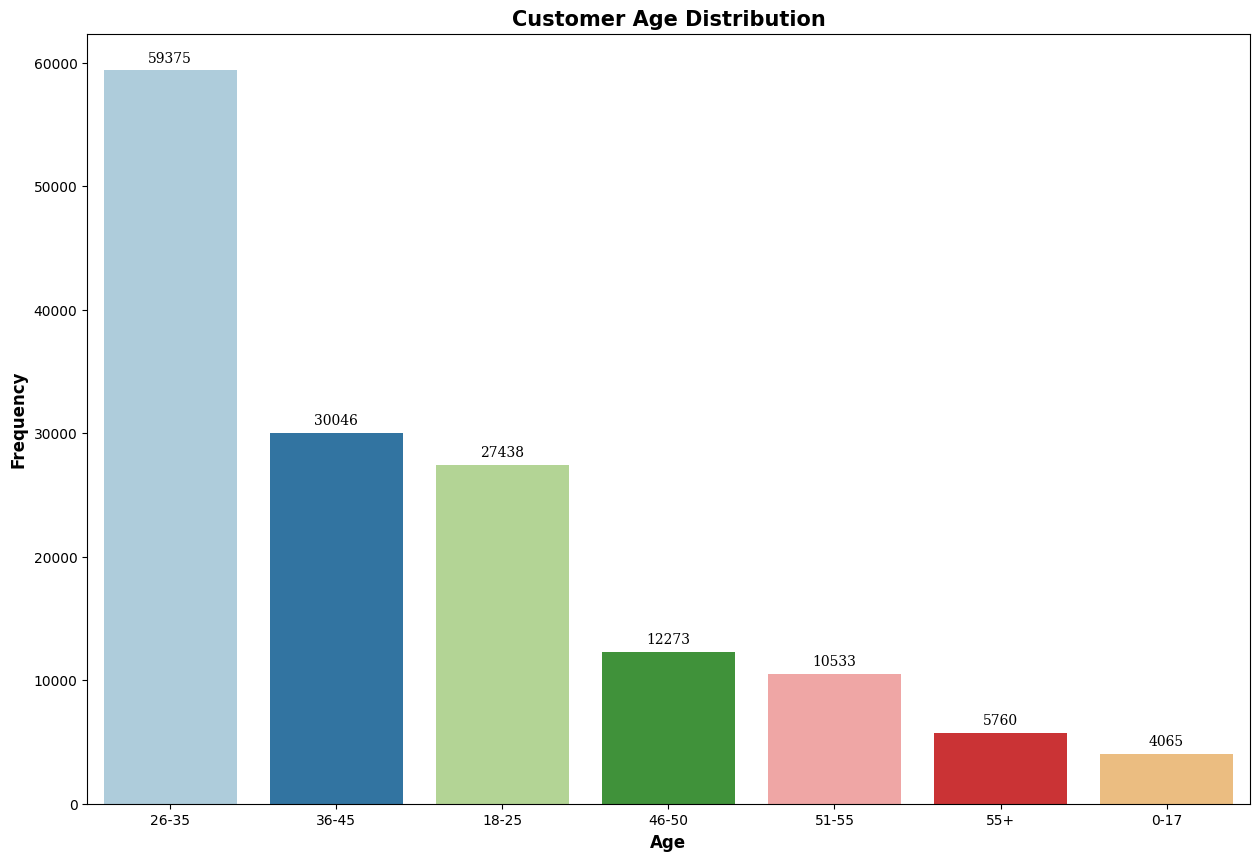

In [ ]:
plt.figure(figsize=(15,10))
temp1=data['Age'].sort_values().value_counts()
color_map=sns.color_palette("Paired", len(temp1))

ax1 = plt.subplot()

for i in temp1.index:
    ax1.text(i, temp1[i] + 1000, temp1[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

sns.barplot(x=temp1.index,y=temp1.values, palette=color_map)
plt.xlabel('Age',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 12,fontweight = 'bold')
plt.title('Customer Age Distribution',fontsize = 15,fontweight = 'bold')
plt.show()

In [ ]:
#@title 3.4: Customer Stay In current City Distribution

<ipython-input-980-6304d29c1992>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp1.index,y=temp1.values, ax=ax1,palette=color_map)


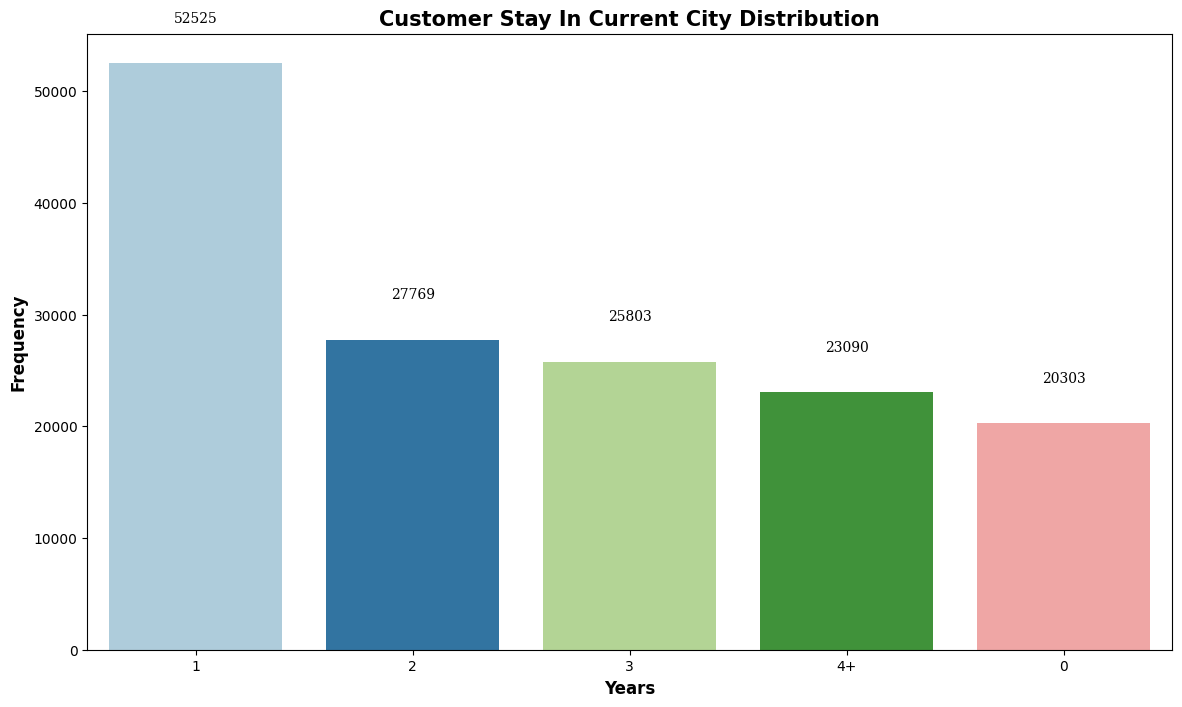

In [ ]:
plt.figure(figsize=(14,8))
temp1=data['Stay_In_Current_City_Years'].sort_values().value_counts()
color_map=sns.color_palette("Paired", len(temp1))

ax1 = plt.subplot()

for i in temp1.index:
    ax1.text(i,temp1[i]+4000,temp1[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')
sns.barplot(x=temp1.index,y=temp1.values, ax=ax1,palette=color_map)
plt.xlabel('Years',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 12,fontweight = 'bold')
plt.title('Customer Stay In Current City Distribution',fontsize = 15,fontweight = 'bold')
plt.show()

In [ ]:
#@title 3.5: Top 10 Products and Categories

<ipython-input-982-1f6412ede65f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp1.index, y=temp1.values,palette='Paired')


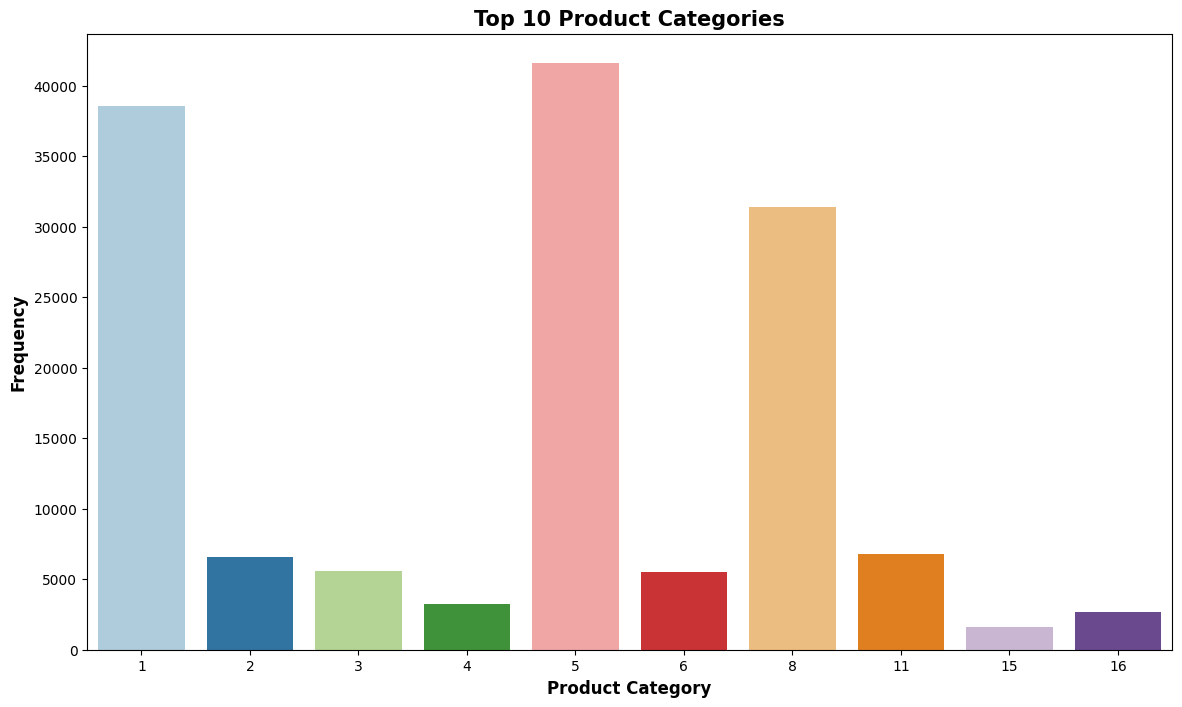

In [ ]:
plt.figure(figsize=(14,8))
temp1=data['Product_Category'].value_counts()[0:10]
sns.barplot(x=temp1.index, y=temp1.values,palette='Paired')
plt.xlabel('Product Category',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 12,fontweight = 'bold')
plt.title('Top 10 Product Categories',fontsize = 15,fontweight = 'bold')
plt.show()

    * Products of category 5 have been sold most followed by 1 & 8

<ipython-input-983-88f0dfc18f23>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp1.index[:10],y=temp1.values[:10],palette='Paired')


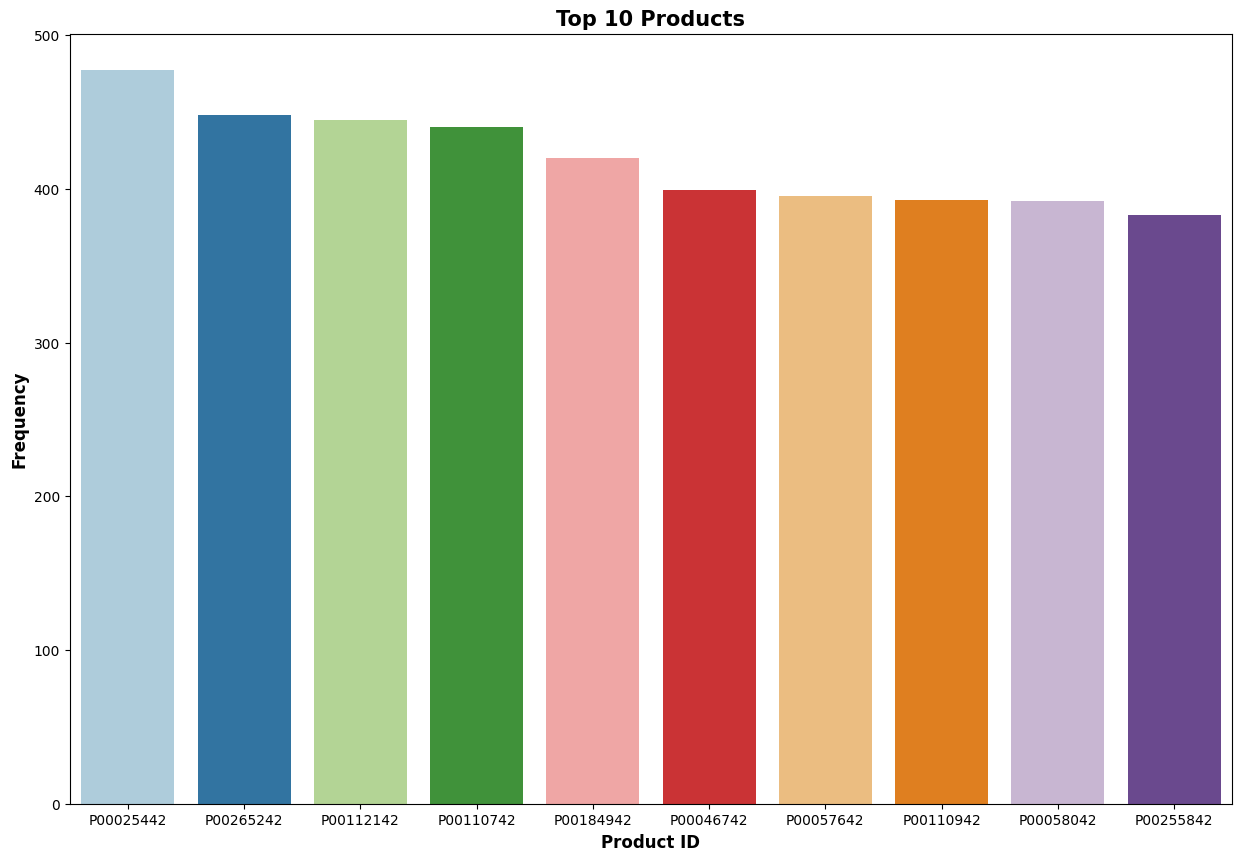

In [ ]:
plt.figure(figsize=(15,10))
temp1=data['Product_ID'].value_counts()

sns.barplot(x=temp1.index[:10],y=temp1.values[:10],palette='Paired')
plt.xlabel('Product ID',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 12,fontweight = 'bold')
plt.title('Top 10 Products',fontsize = 15,fontweight = 'bold')
plt.show()

In [ ]:
#@title 3.6: Top 10 Customer Occupation

<ipython-input-985-4fce35c26511>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp1.index[:10],y=temp1.values[:10],palette='Paired')


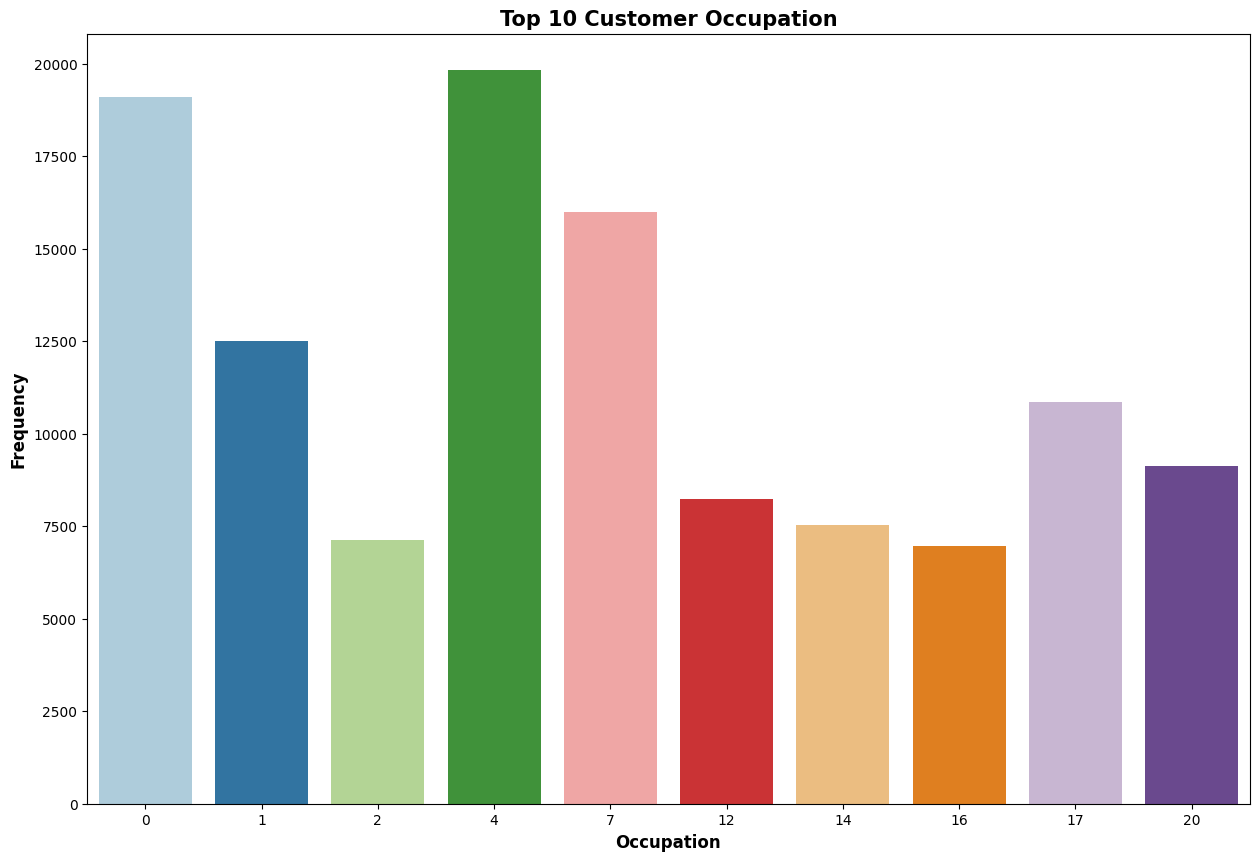

In [ ]:
plt.figure(figsize=(15,10))
temp1=data['Occupation'].sort_values(ascending=False).value_counts()


sns.barplot(x=temp1.index[:10],y=temp1.values[:10],palette='Paired')
plt.xlabel('Occupation',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frequency',fontsize = 12,fontweight = 'bold')
plt.title('Top 10 Customer Occupation',fontsize = 15,fontweight = 'bold')
plt.show()

    * Customers of occupation of type 4 have ordered most no of orders

In [ ]:
#@title 4: Bivariate Analysis:- Purchase Pattern Analysis

<ipython-input-987-8c30eb8f3d06>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='Gender',y='Purchase',palette="tab10")
<ipython-input-987-8c30eb8f3d06>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='City_Category',y='Purchase',palette="tab10")
<ipython-input-987-8c30eb8f3d06>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='Marital_Status',y='Purchase',palette="tab10")
<ipython-input-987-8c30eb8f3d06>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

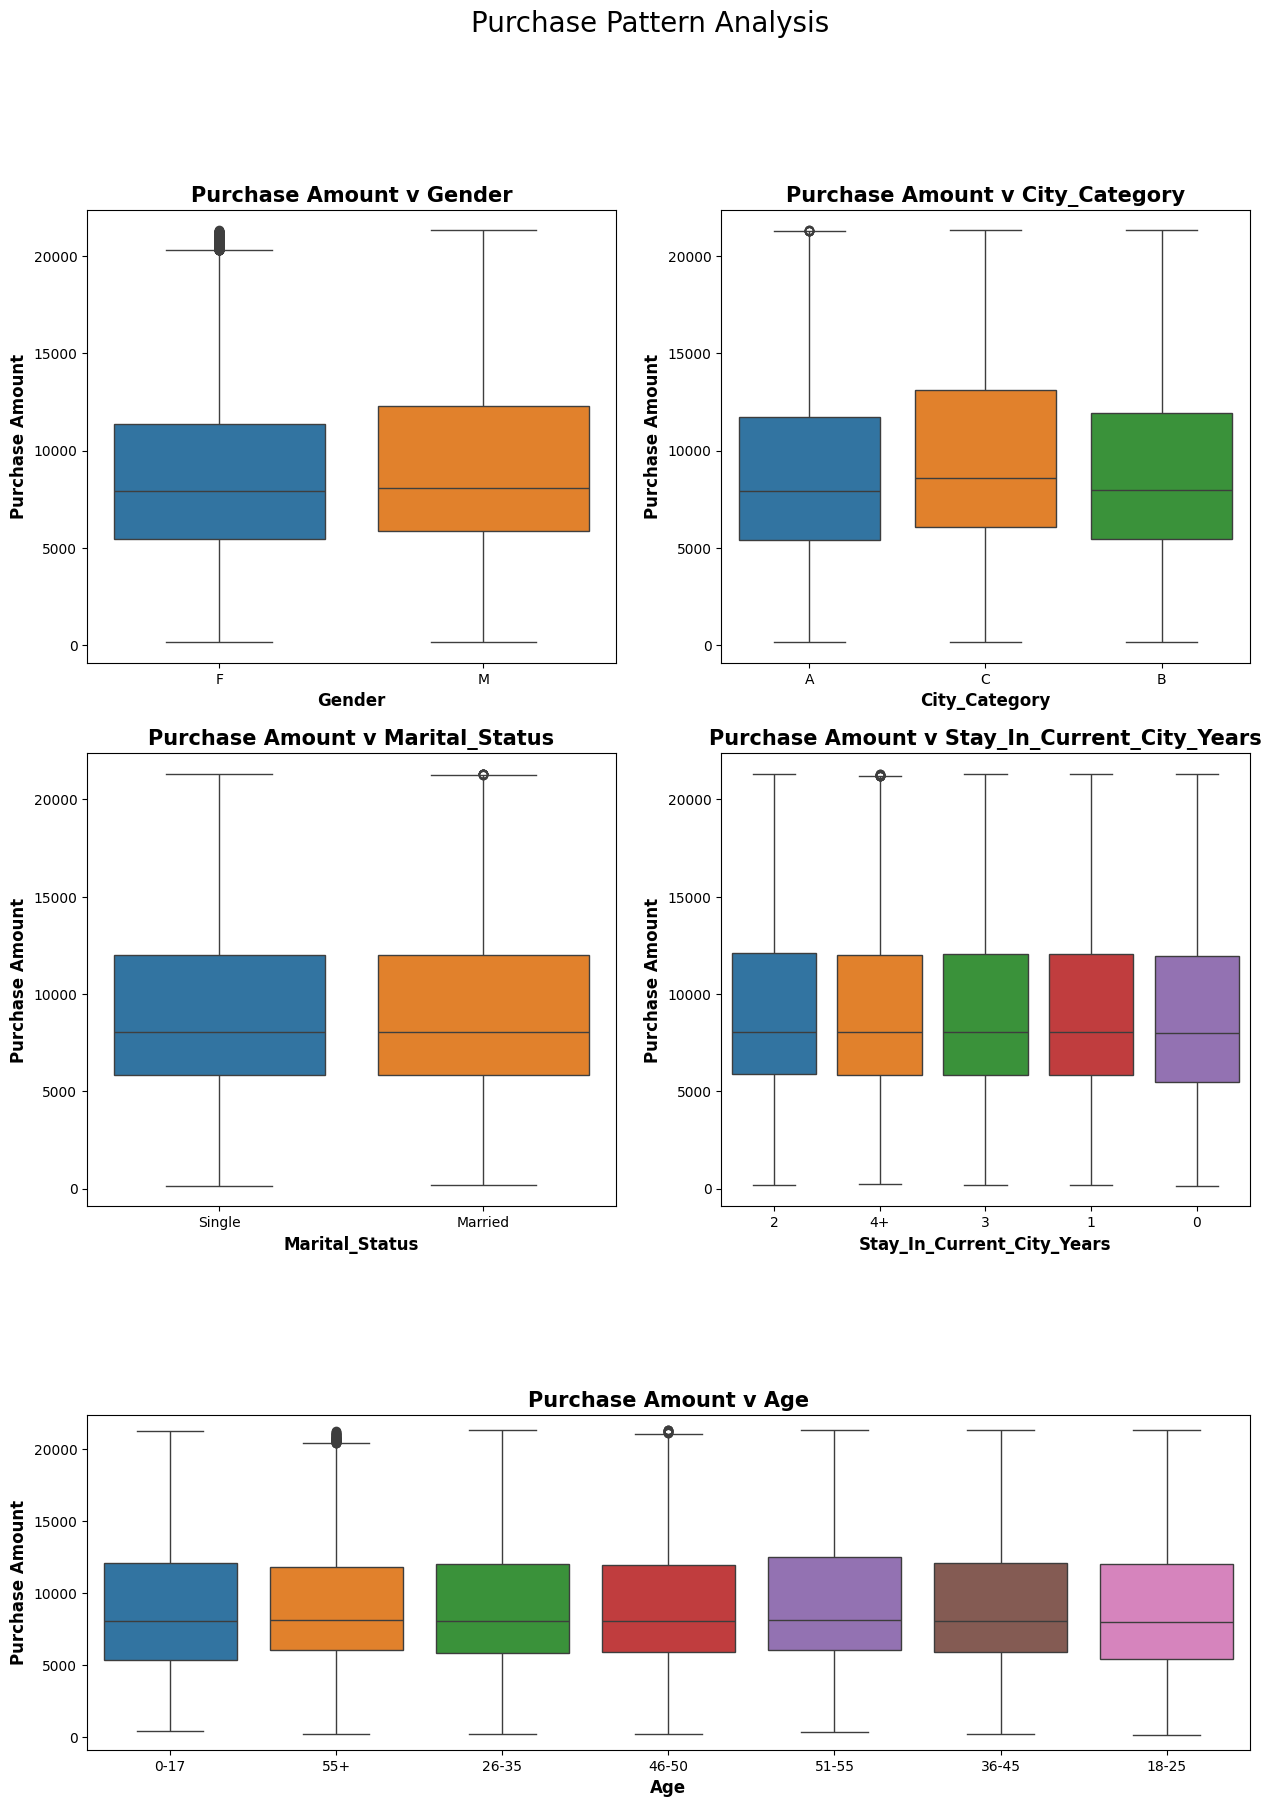

In [ ]:
plt.figure(figsize=(15,20)).suptitle("Purchase Pattern Analysis",fontsize=20)


plt.subplot(3,2,1)
sns.boxplot(data=data,x='Gender',y='Purchase',palette="tab10")
plt.xlabel('Gender',fontsize = 12,fontweight = 'bold')
plt.ylabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
plt.title('Purchase Amount v Gender',fontsize = 15,fontweight = 'bold')

plt.subplot(3,2,2)
sns.boxplot(data=data,x='City_Category',y='Purchase',palette="tab10")
plt.xlabel('City_Category',fontsize = 12,fontweight = 'bold')
plt.ylabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
plt.title('Purchase Amount v City_Category',fontsize = 15,fontweight = 'bold')

plt.subplot(3,2,3)
sns.boxplot(data=data,x='Marital_Status',y='Purchase',palette="tab10")
plt.xlabel('Marital_Status',fontsize = 12,fontweight = 'bold')
plt.ylabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
plt.title('Purchase Amount v Marital_Status',fontsize = 15,fontweight = 'bold')

plt.subplot(3,2,4)
sns.boxplot(data=data,x='Stay_In_Current_City_Years',y='Purchase',palette="tab10")
plt.xlabel('Stay_In_Current_City_Years',fontsize = 12,fontweight = 'bold')
plt.ylabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
plt.title('Purchase Amount v Stay_In_Current_City_Years',fontsize = 15,fontweight = 'bold')

plt.subplot(4,1,4)
sns.boxplot(data=data,x='Age',y='Purchase',palette="tab10")
plt.xlabel('Age',fontsize = 12,fontweight = 'bold')
plt.ylabel('Purchase Amount',fontsize = 12,fontweight = 'bold')
plt.title('Purchase Amount v Age',fontsize = 15,fontweight = 'bold')


plt.show()



    - Out of all the variables analysed above, it's noteworthy that the
      purchase amount remains relatively stable regardless of the variable
      under consideration. As indicated in the data, the median purchase amount
      consistently hovers around 8,000 bucks, regardless of the specific
      variable being examined.

In [ ]:
#@title 5: 95% Confidence Interval for Gender v Purchase amount

In [ ]:
male_data_purchase=data.loc[data['Gender']=='M','Purchase']
female_data_purchase=data.loc[data['Gender']=='F','Purchase']

In [ ]:
male_data_purchase.describe()


,Purchase
count,113071.000000
mean,9403.735281
std,4972.467396
min,185.000000
25%,5873.000000
50%,8094.000000
75%,12277.000000
max,21314.000000


In [ ]:
female_data_purchase.describe()

,Purchase
count,36419.000000
mean,8722.028282
std,4609.771933
min,160.000000
25%,5445.000000
50%,7916.000000
75%,11382.500000
max,21309.000000


In [ ]:
#@title 5.1: Using CLT

In [ ]:
male95_df=pd.DataFrame(columns=['Gender','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
alpha=0.05
z_critical=norm.ppf(1-alpha/2)
list1=[300,3000,10000,len(male_data_purchase)]

for i in list1:

    sample1M=male_data_purchase.sample(i)

    mean2=round(sample1M.mean(),2)
    mstd2=sample1M.std()
    lower_limit2=round(mean2-z_critical*(mstd2/math.sqrt(len(sample1M))),2)
    upper_limit2=round(mean2+z_critical*(mstd2/math.sqrt(len(sample1M))),2)
    range2=round(upper_limit2-lower_limit2,2)


    male_samp1 = pd.DataFrame({'Gender': ['M'],
                        'Lower_limit': [lower_limit2],
                        'Upper_limit': [upper_limit2],
                        'Range': [range2],
                        'Sample_size': [len(sample1M)],
                        'CI': [[lower_limit2,upper_limit2]],
                        'Confidence_pct': [(1-alpha)*100]})

    male95_df = pd.concat([male95_df, male_samp1], ignore_index=True)

<ipython-input-994-2b1919ee2acd>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  male95_df = pd.concat([male95_df, male_samp1], ignore_index=True)


In [ ]:
male95_df

,Gender,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,M,9102.98,10224.68,1121.70,300,"[9102.98, 10224.68]",95.0
1,M,9203.30,9547.74,344.44,3000,"[9203.3, 9547.74]",95.0
2,M,9355.25,9552.83,197.58,10000,"[9355.25, 9552.83]",95.0
3,M,9374.76,9432.72,57.96,113071,"[9374.76, 9432.72]",95.0


In [ ]:
female95_df=pd.DataFrame(columns=['Gender','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
alpha=0.05
z_critical=norm.ppf(1-alpha/2)
list1=[300,3000,10000,len(female_data_purchase)]

for i in list1:

    sample1f=female_data_purchase.sample(i)

    mean2=sample1f.mean()
    mstd2=sample1f.std()
    lower_limit2=round(mean2-z_critical*(mstd2/math.sqrt(len(sample1f))),2)
    upper_limit2=round(mean2+z_critical*(mstd2/math.sqrt(len(sample1f))),2)
    range2=round(upper_limit2-lower_limit2,2)


    female_samp1 = pd.DataFrame({'Gender': ['F'],
                        'Lower_limit': [lower_limit2],
                        'Upper_limit': [upper_limit2],
                        'Range': [range2],
                        'Sample_size': [len(sample1f)],
                        'CI': [[lower_limit2,upper_limit2]],
                        'Confidence_pct': [(1-alpha)*100]})

    female95_df = pd.concat([female95_df, female_samp1], ignore_index=True)

<ipython-input-997-3ea4a114c68b>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  female95_df = pd.concat([female95_df, female_samp1], ignore_index=True)


In [ ]:
female95_df

,Gender,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,F,8079.44,9048.17,968.73,300,"[8079.44, 9048.17]",95.0
1,F,8615.76,8947.07,331.31,3000,"[8615.76, 8947.07]",95.0
2,F,8666.74,8848.43,181.69,10000,"[8666.74, 8848.43]",95.0
3,F,8674.68,8769.37,94.69,36419,"[8674.68, 8769.37]",95.0


In [ ]:
Gender_df=pd.concat([male95_df,female95_df],ignore_index=True)

In [ ]:
Gender_df.sort_values(by='Sample_size',ignore_index=True)

,Gender,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,M,9102.98,10224.68,1121.70,300,"[9102.98, 10224.68]",95.0
1,F,8079.44,9048.17,968.73,300,"[8079.44, 9048.17]",95.0
2,M,9203.30,9547.74,344.44,3000,"[9203.3, 9547.74]",95.0
3,F,8615.76,8947.07,331.31,3000,"[8615.76, 8947.07]",95.0
4,M,9355.25,9552.83,197.58,10000,"[9355.25, 9552.83]",95.0
5,F,8666.74,8848.43,181.69,10000,"[8666.74, 8848.43]",95.0
6,F,8674.68,8769.37,94.69,36419,"[8674.68, 8769.37]",95.0
7,M,9374.76,9432.72,57.96,113071,"[9374.76, 9432.72]",95.0


In [ ]:
#@title 5.2: Using bootstrapping

In [ ]:
male95_bt=pd.DataFrame(columns=['Gender','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[300,3000,30000,len(male_data_purchase)]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(male_data_purchase,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Gender':'M','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    male95_bt=pd.concat([male95_bt,temp_bt],ignore_index=True)

<ipython-input-1003-3e8f703596c6>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  male95_bt=pd.concat([male95_bt,temp_bt],ignore_index=True)


In [ ]:
male95_bt.sort_values(by='Sample_size',ignore_index=True)

,Gender,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,M,8849.36,9985.47,1136.11,300,"[8849.36, 9985.47]",95
1,M,9225.42,9582.20,356.78,3000,"[9225.42, 9582.2]",95
2,M,9346.57,9460.58,114.01,30000,"[9346.57, 9460.58]",95
3,M,9373.81,9432.76,58.95,113071,"[9373.81, 9432.76]",95


In [ ]:
female95_bt=pd.DataFrame(columns=['Gender','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[300,3000,30000,len(female_data_purchase)]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(female_data_purchase,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Gender':'F','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    female95_bt=pd.concat([female95_bt,temp_bt],ignore_index=True)

<ipython-input-1006-cefe05eef21a>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  female95_bt=pd.concat([female95_bt,temp_bt],ignore_index=True)


In [ ]:
female95_bt.sort_values(by='Sample_size',ignore_index=True)

,Gender,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,F,8198.52,9250.55,1052.03,300,"[8198.52, 9250.55]",95
1,F,8559.75,8887.03,327.28,3000,"[8559.75, 8887.03]",95
2,F,8669.25,8774.11,104.86,30000,"[8669.25, 8774.11]",95
3,F,8675.35,8769.17,93.82,36419,"[8675.35, 8769.17]",95


In [ ]:
Gender_final_bt=pd.concat([male95_bt,female95_bt],ignore_index=True)

In [ ]:
Gender_final_bt.sort_values(by='Sample_size',ignore_index=True)

,Gender,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,M,8849.36,9985.47,1136.11,300,"[8849.36, 9985.47]",95
1,F,8198.52,9250.55,1052.03,300,"[8198.52, 9250.55]",95
2,M,9225.42,9582.20,356.78,3000,"[9225.42, 9582.2]",95
3,F,8559.75,8887.03,327.28,3000,"[8559.75, 8887.03]",95
4,M,9346.57,9460.58,114.01,30000,"[9346.57, 9460.58]",95
5,F,8669.25,8774.11,104.86,30000,"[8669.25, 8774.11]",95
6,F,8675.35,8769.17,93.82,36419,"[8675.35, 8769.17]",95
7,M,9373.81,9432.76,58.95,113071,"[9373.81, 9432.76]",95


###Inference###

**1. Sample Size**
   - The analysis highlights the importance of sample size in estimating population parameters. It suggests that `as the sample size increases, the confidence intervals become narrower and more precise`. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

**2. Confidence Intervals**
- From the above analysis, we can see that except for the Sample Size of 300, `the confidence interval do not overlap` as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.

**3. Population Average**
- We are `95% confident` that the true population average for  falls between
    * Using CLT
      for male `9374` and `9,432`, and for `females`, it falls between `8,674' and 8,769`.
    * Using Bootstrapping
      for male `9373' and '9,432`, and for `females`, it falls between `8,674' and 8,769`

**4. Women spend less**
- `Men tend to spend more money per transaction on average than women`, as the upper bounds of the confidence intervals for men are consistently higher than those for women across different sample sizes.

**How can Walmart leverage this conclusion to make changes or improvements?**

**1. Segmentation Opportunities**
- Walmart can create targeted marketing campaigns, loyalty programs, or product bundles to cater to the distinct spending behaviors of male and female customers. This approach may help maximize revenue from each customer segment.

**2. Pricing Strategies**
- Based on the above data of average spending per transaction by gender, they might adjust pricing or discount strategies to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

In [ ]:
#@title 6: 95% Confidence Interval for Marital Status v Purchase amount

In [ ]:
unmarried_data_purchase=data.loc[data['Marital_Status']=='Single','Purchase'].reset_index(drop=True)
married_data_purchase=data.loc[data['Marital_Status']=='Married','Purchase'].reset_index(drop=True)

In [ ]:
unmarried_data_purchase.describe()

,Purchase
count,88400.000000
mean,9229.317534
std,4907.645716
min,160.000000
25%,5818.000000
50%,8037.000000
75%,12028.000000
max,21309.000000


In [ ]:
married_data_purchase.describe()

,Purchase
count,61090.000000
mean,9249.723850
std,4877.461565
min,187.000000
25%,5867.000000
50%,8054.000000
75%,12028.000000
max,21314.000000


In [ ]:
#@title 6.1: Using CLT

In [ ]:
unmarried_df=pd.DataFrame(columns=['Marital_Status','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
alpha=0.05
z_critical=norm.ppf(1-alpha/2)
list1=[300,3000,30000,len(unmarried_data_purchase)]

for i in list1:

    sample1M=unmarried_data_purchase.sample(i)

    mean2=sample1M.mean()
    mstd2=sample1M.std()
    lower_limit2=round(mean2-z_critical*(mstd2/math.sqrt(len(sample1M))),2)
    upper_limit2=round(mean2+z_critical*(mstd2/math.sqrt(len(sample1M))),2)
    range2=round(upper_limit2-lower_limit2,2)


    unmarried_samp1 = pd.DataFrame({'Marital_Status': ['Single'],
                        'Lower_limit': [lower_limit2],
                        'Upper_limit': [upper_limit2],
                        'Range': [range2],
                        'Sample_size': [len(sample1M)],
                        'CI': [[lower_limit2,upper_limit2]],
                        'Confidence_pct': [(1-alpha)*100]})

    unmarried_df = pd.concat([unmarried_df, unmarried_samp1], ignore_index=True)

<ipython-input-1016-797d36f16c3a>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  unmarried_df = pd.concat([unmarried_df, unmarried_samp1], ignore_index=True)


In [ ]:
unmarried_df

,Marital_Status,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,Single,9028.78,10161.89,1133.11,300,"[9028.78, 10161.89]",95.0
1,Single,8990.44,9343.93,353.49,3000,"[8990.44, 9343.93]",95.0
2,Single,9147.74,9258.52,110.78,30000,"[9147.74, 9258.52]",95.0
3,Single,9196.97,9261.67,64.70,88400,"[9196.97, 9261.67]",95.0


In [ ]:
married_df=pd.DataFrame(columns=['Marital_Status','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
alpha=0.05
z_critical=norm.ppf(1-alpha/2)
list1=[300,3000,30000,len(married_data_purchase)]

for i in list1:

    sample1U=married_data_purchase.sample(i)

    mean2=sample1U.mean()
    mstd2=sample1U.std()
    lower_limit2=round(mean2-z_critical*(mstd2/math.sqrt(len(sample1U))),2)
    upper_limit2=round(mean2+z_critical*(mstd2/math.sqrt(len(sample1U))),2)
    range2=round(upper_limit2-lower_limit2,2)


    married_samp1 = pd.DataFrame({'Marital_Status': ['Married'],
                        'Lower_limit': [lower_limit2],
                        'Upper_limit': [upper_limit2],
                        'Range': [range2],
                        'Sample_size': [len(sample1U)],
                        'CI': [[lower_limit2,upper_limit2]],
                        'Confidence_pct': [(1-alpha)*100]})

    married_df = pd.concat([married_df, married_samp1], ignore_index=True)

<ipython-input-1019-88afbaff02f3>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  married_df = pd.concat([married_df, married_samp1], ignore_index=True)


In [ ]:
married_df

,Marital_Status,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,Married,8691.10,9795.28,1104.18,300,"[8691.1, 9795.28]",95.0
1,Married,9005.36,9351.91,346.55,3000,"[9005.36, 9351.91]",95.0
2,Married,9214.48,9325.45,110.97,30000,"[9214.48, 9325.45]",95.0
3,Married,9211.05,9288.40,77.35,61090,"[9211.05, 9288.4]",95.0


In [ ]:
Marital_Status_df=pd.concat([unmarried_df,married_df],ignore_index=True)

In [ ]:
Marital_Status_df.sort_values(by='Sample_size',ignore_index=True)

,Marital_Status,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,Single,9028.78,10161.89,1133.11,300,"[9028.78, 10161.89]",95.0
1,Married,8691.10,9795.28,1104.18,300,"[8691.1, 9795.28]",95.0
2,Single,8990.44,9343.93,353.49,3000,"[8990.44, 9343.93]",95.0
3,Married,9005.36,9351.91,346.55,3000,"[9005.36, 9351.91]",95.0
4,Single,9147.74,9258.52,110.78,30000,"[9147.74, 9258.52]",95.0
5,Married,9214.48,9325.45,110.97,30000,"[9214.48, 9325.45]",95.0
6,Married,9211.05,9288.40,77.35,61090,"[9211.05, 9288.4]",95.0
7,Single,9196.97,9261.67,64.70,88400,"[9196.97, 9261.67]",95.0


In [ ]:
#@title 6.2: Using bootstrappig

In [ ]:
Unmarried95_bt=pd.DataFrame(columns=['Marital_status','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[300,3000,30000,len(unmarried_data_purchase)]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(unmarried_data_purchase,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Marital_status':'Single','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    Unmarried95_bt=pd.concat([Unmarried95_bt,temp_bt],ignore_index=True)

<ipython-input-1025-7bdf52a03aeb>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Unmarried95_bt=pd.concat([Unmarried95_bt,temp_bt],ignore_index=True)


In [ ]:
Unmarried95_bt.sort_values(by='Sample_size',ignore_index=True)

,Marital_status,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,Single,8667.95,9784.09,1116.14,300,"[8667.95, 9784.09]",95
1,Single,9054.06,9408.18,354.12,3000,"[9054.06, 9408.18]",95
2,Single,9173.10,9283.08,109.98,30000,"[9173.1, 9283.08]",95
3,Single,9196.60,9262.20,65.60,88400,"[9196.6, 9262.2]",95


In [ ]:
Married95_bt=pd.DataFrame(columns=['Marital_status','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[300,3000,30000,len(married_data_purchase)]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(married_data_purchase,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Marital_status':'Married','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    Married95_bt=pd.concat([Married95_bt,temp_bt],ignore_index=True)

<ipython-input-1028-127b9e41b637>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Married95_bt=pd.concat([Married95_bt,temp_bt],ignore_index=True)


In [ ]:
Married95_bt.sort_values(by='Sample_size',ignore_index=True)

,Marital_status,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,Married,8702.47,9804.66,1102.19,300,"[8702.47, 9804.66]",95
1,Married,9074.70,9427.71,353.01,3000,"[9074.7, 9427.71]",95
2,Married,9194.11,9305.23,111.12,30000,"[9194.11, 9305.23]",95
3,Married,9210.47,9288.40,77.93,61090,"[9210.47, 9288.4]",95


In [ ]:
Marital_final_bt=pd.concat([Unmarried95_bt,Married95_bt],ignore_index=True)

In [ ]:
Marital_final_bt.sort_values(by='Sample_size',ignore_index=True)

,Marital_status,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,Single,8667.95,9784.09,1116.14,300,"[8667.95, 9784.09]",95
1,Married,8702.47,9804.66,1102.19,300,"[8702.47, 9804.66]",95
2,Single,9054.06,9408.18,354.12,3000,"[9054.06, 9408.18]",95
3,Married,9074.70,9427.71,353.01,3000,"[9074.7, 9427.71]",95
4,Single,9173.10,9283.08,109.98,30000,"[9173.1, 9283.08]",95
5,Married,9194.11,9305.23,111.12,30000,"[9194.11, 9305.23]",95
6,Married,9210.47,9288.40,77.93,61090,"[9210.47, 9288.4]",95
7,Single,9196.60,9262.20,65.60,88400,"[9196.6, 9262.2]",95


### Inference

**1. Sample Size**
   - The analysis highlights the importance of sample size in estimating population parameters. It suggests that `as the sample size increases, the confidence intervals become narrower and more precise`. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

**2. Confidence Intervals**
- From the above analysis, we can see that `the confidence interval overlap` for all the sample sizes. This means that there is `no statistically significant difference` between the average spending per transaction for married and unmarried customers within the given samples.

**3. Population Average**
- We are `95% confident` that the true population average for  falls between
    * Using CLT
     For `Single` between `9196` and `9261`, and for `Married`, it falls between `9211` and `9288`
    * Using Bootstrapping
     For `Single` between `9196` and `9262`, and for `Married`, it falls between `9210' and '9288`

**4. Both the customers spend equal**
- The overlapping confidence intervals of average spending for married and unmarried customers indicate that `both married and single customers spend a similar amount per transaction`. This implies a resemblance in spending behavior between the two groups.

**How can Walmart leverage this conclusion to make changes or improvements?**

**1. Marketing Resources**
-  Walmart may not need to allocate marketing resources specifically targeting one group over the other. Instead, they can focus on broader marketing strategies that appeal to both groups.

In [ ]:
#@title 7: 95% Confidence interval for different age groups v Purchase amount

In [ ]:
data.groupby(['Age']).size().reset_index(name='Count')

,Age,Count
0,0-17,4065
1,18-25,27438
2,26-35,59375
3,36-45,30046
4,46-50,12273
5,51-55,10533
6,55+,5760


Here we are gonna use only bootstrapping method as the sizes of a few population are less and bootstrapping can give us more accurate results

In [ ]:
    df_1 = data.loc[data['Age'] == '0-17','Purchase']
    df_2 = data.loc[data['Age'] == '18-25','Purchase']
    df_3 = data.loc[data['Age'] == '26-35','Purchase']
    df_4 = data.loc[data['Age'] == '36-45','Purchase']
    df_5 = data.loc[data['Age'] == '46-50','Purchase']
    df_6 = data.loc[data['Age'] == '51-55','Purchase']
    df_7 = data.loc[data['Age'] == '55+','Purchase']

In [ ]:
age_df1=pd.DataFrame(columns=['Age','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[500,1000,2000]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(df_1,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Age':'0-17','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    age_df1=pd.concat([age_df1,temp_bt],ignore_index=True)

<ipython-input-1036-a75feb17640c>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  age_df1=pd.concat([age_df1,temp_bt],ignore_index=True)


In [ ]:
age_df1

,Age,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,0-17,8633.58,9520.80,887.22,500,"[8633.58, 9520.8]",95
1,0-17,8754.11,9380.36,626.25,1000,"[8754.11, 9380.36]",95
2,0-17,8851.29,9296.64,445.35,2000,"[8851.29, 9296.64]",95


In [ ]:
age_df2=pd.DataFrame(columns=['Age','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[500,1000,2000]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(df_2,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Age':'18-25','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    age_df2=pd.concat([age_df2,temp_bt],ignore_index=True)

<ipython-input-1039-7ed29c48d8c6>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  age_df2=pd.concat([age_df2,temp_bt],ignore_index=True)


In [ ]:
age_df2

,Age,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,18-25,8697.09,9563.21,866.12,500,"[8697.09, 9563.21]",95
1,18-25,8827.18,9429.23,602.05,1000,"[8827.18, 9429.23]",95
2,18-25,8914.94,9343.34,428.40,2000,"[8914.94, 9343.34]",95


In [ ]:
age_df3=pd.DataFrame(columns=['Age','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[500,1000,2000]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(df_3,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Age':'26-35','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    age_df3=pd.concat([age_df3,temp_bt],ignore_index=True)

<ipython-input-1042-900ee932bf39>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  age_df3=pd.concat([age_df3,temp_bt],ignore_index=True)


In [ ]:
age_df3

,Age,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,26-35,8808.40,9666.07,857.67,500,"[8808.4, 9666.07]",95
1,26-35,8937.47,9543.86,606.39,1000,"[8937.47, 9543.86]",95
2,26-35,9023.04,9449.00,425.96,2000,"[9023.04, 9449.0]",95


In [ ]:
age_df4=pd.DataFrame(columns=['Age','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[500,1000,2000]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(df_4,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Age':'36-45','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    age_df4=pd.concat([age_df4,temp_bt],ignore_index=True)

<ipython-input-1045-f341ae1d5ddc>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  age_df4=pd.concat([age_df4,temp_bt],ignore_index=True)


In [ ]:
age_df4

,Age,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,36-45,8868.86,9731.36,862.50,500,"[8868.86, 9731.36]",95
1,36-45,8982.90,9593.69,610.79,1000,"[8982.9, 9593.69]",95
2,36-45,9074.07,9501.08,427.01,2000,"[9074.07, 9501.08]",95


In [ ]:
age_df5=pd.DataFrame(columns=['Age','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[500,1000,2000]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(df_5,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Age':'46-50','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    age_df5=pd.concat([age_df5,temp_bt],ignore_index=True)

<ipython-input-1048-60d411bbe4e8>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  age_df5=pd.concat([age_df5,temp_bt],ignore_index=True)


In [ ]:
age_df5

,Age,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,46-50,8757.90,9600.61,842.71,500,"[8757.9, 9600.61]",95
1,46-50,8876.31,9473.75,597.44,1000,"[8876.31, 9473.75]",95
2,46-50,8969.71,9386.22,416.51,2000,"[8969.71, 9386.22]",95


In [ ]:
age_df6=pd.DataFrame(columns=['Age','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[500,1000,2000]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(df_6,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Age':'51-55','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    age_df6=pd.concat([age_df6,temp_bt],ignore_index=True)

<ipython-input-1051-4d9604f14c01>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  age_df6=pd.concat([age_df6,temp_bt],ignore_index=True)


In [ ]:
age_df6

,Age,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,51-55,9082.82,9951.85,869.03,500,"[9082.82, 9951.85]",95
1,51-55,9200.03,9824.07,624.04,1000,"[9200.03, 9824.07]",95
2,51-55,9298.80,9726.66,427.86,2000,"[9298.8, 9726.66]",95


In [ ]:
age_df7=pd.DataFrame(columns=['Age','Lower_limit','Upper_limit','Range','Sample_size','CI','Confidence_pct'])

In [ ]:
sample_list=[500,1000,2000]
samples_taken={}
for i in sample_list:
    sample_means=[]
    for j in np.arange(10000):
        bootstrapped_samples=np.random.choice(df_7,i,replace=True)
        sample_means.append(bootstrapped_samples.mean())

    samples_taken[i]=sample_means
    lower_limit=round(np.percentile(sample_means,2.5),2)
    upper_limit=round(np.percentile(sample_means,97.5),2)
    range2=round(upper_limit-lower_limit,2)

    temp_bt=pd.DataFrame({'Age':'55+','Lower_limit':lower_limit,'Upper_limit':upper_limit,'Range':range2,'Sample_size':i,'CI':[[lower_limit,upper_limit]],'Confidence_pct':[95]})
    age_df7=pd.concat([age_df7,temp_bt],ignore_index=True)

<ipython-input-1054-ce74b51fbeb2>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  age_df7=pd.concat([age_df7,temp_bt],ignore_index=True)


In [ ]:
age_df7

,Age,Lower_limit,Upper_limit,Range,Sample_size,CI,Confidence_pct
0,55+,8826.05,9658.24,832.19,500,"[8826.05, 9658.24]",95
1,55+,8943.37,9528.84,585.47,1000,"[8943.37, 9528.84]",95
2,55+,9033.91,9445.71,411.80,2000,"[9033.91, 9445.71]",95


In [ ]:
final_age_df=pd.concat([age_df1,age_df2,age_df3,age_df4,age_df5,age_df6,age_df7],ignore_index=True)

In [ ]:
final_age_df=final_age_df[['Age','CI','Range','Sample_size']]

In [ ]:
final_age_df

,Age,CI,Range,Sample_size
0,0-17,"[8633.58, 9520.8]",887.22,500
1,0-17,"[8754.11, 9380.36]",626.25,1000
2,0-17,"[8851.29, 9296.64]",445.35,2000
3,18-25,"[8697.09, 9563.21]",866.12,500
4,18-25,"[8827.18, 9429.23]",602.05,1000
5,18-25,"[8914.94, 9343.34]",428.40,2000
6,26-35,"[8808.4, 9666.07]",857.67,500
7,26-35,"[8937.47, 9543.86]",606.39,1000
8,26-35,"[9023.04, 9449.0]",425.96,2000
9,36-45,"[8868.86, 9731.36]",862.50,500


In [ ]:
final_age_df.pivot(index='Age',columns='Sample_size',values=['CI','Range'])


CI                                          \
Sample_size                500                 1000                2000   
Age                                                                       
0-17          [8633.58, 9520.8]  [8754.11, 9380.36]  [8851.29, 9296.64]   
18-25        [8697.09, 9563.21]  [8827.18, 9429.23]  [8914.94, 9343.34]   
26-35         [8808.4, 9666.07]  [8937.47, 9543.86]   [9023.04, 9449.0]   
36-45        [8868.86, 9731.36]   [8982.9, 9593.69]  [9074.07, 9501.08]   
46-50         [8757.9, 9600.61]  [8876.31, 9473.75]  [8969.71, 9386.22]   
51-55        [9082.82, 9951.85]  [9200.03, 9824.07]   [9298.8, 9726.66]   
55+          [8826.05, 9658.24]  [8943.37, 9528.84]  [9033.91, 9445.71]   

              Range                  
Sample_size    500     1000    2000  
Age                                  
0-17         887.22  626.25  445.35  
18-25        866.12  602.05   428.4  
26-35        857.67  606.39  425.96  
36-45         862.5  610.79  427.01  
46-50        842.71  597.44  416.51  
51-55        869.03  624.04  427.86  
55+          832.19  585.47   411.8

###  Inference

**1. Sample Size**
   - The analysis highlights the importance of sample size in estimating population parameters. It suggests that `as the sample size increases, the confidence intervals become narrower and more precise`. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

**2. Confidence Intervals and customer spending patterns**
- From the above analysis, we can see that `the confidence interval overlap` for some of the age groups. We can club the average spending into following age groups -
    - 0 - 17 - Customers in this age group have the lowest spending per transaction
    - 18 - 25, 26 - 35, 46 - 50 -  Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics
    - 36 - 45, 55+ - Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns
    - 51 - 55 - Customers in this age group have the highest spending per transaction

**3. Population Average**
- We are `95% confident` that for 2000 samples average for following age groups falls between the below range -

    - 0 - 17  = (8851-9296)
    - 18 - 25 = (8914-9343)
    - 26 - 35 = (9023-9449)
    - 36 - 45 = (9074-9501)
    - 46 - 50 = (8969-9386)
    - 51 - 55 = (9298-9726)
    - 55+     = (9033-9445)


**How can Walmart leverage this conclusion to make changes or improvements?**

**1. Targeted Marketing**
-  Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. Walmart can also tailor their product selection and marketing strategies to appeal to the preferences and needs of this age group

**2. Customer Segmentation**
-  Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

**3. Premium Services**
- Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart can explore opportunities to enhance the shopping experience for this demographic. This might involve offering premium services, personalized recommendations, or loyalty programs that cater to the preferences and spending habits of this age group.


### **Recommendations**  ###
**1.Target Male Shoppers**
- Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

**2. Focus on 26 - 45 Age Group**
-  With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.

**3. Engaging Younger Shoppers**
- Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

**4. Customer Segmentation**
- Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

**5. Enhance the 51 - 55 Age Group Shopping Experience**
- Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.
